In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_excel('皮尔逊系数.xlsx')


In [109]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index("DATE", inplace=True)


Text(0, 0.5, 'Total market value of cryptocurrencies')

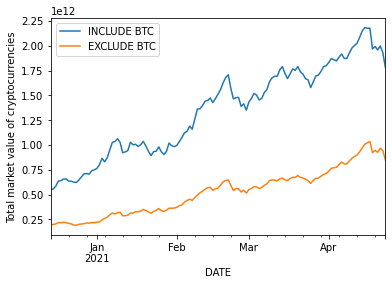

In [112]:
df.plot()
plt.ylabel('Total market value of cryptocurrencies')

Pandas computed Pearson r: 0.9834314632861094
Scipy computed Pearson r: 0.98343146328611 and p-value: 1.5142030924165074e-97


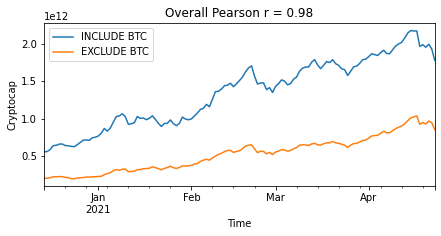

In [113]:
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# 输出：使用 Pandas 计算皮尔逊相关结果的 r 值：0.2058774513561943

r, p = stats.pearsonr(df.dropna()['INCLUDE BTC'], df.dropna()['EXCLUDE BTC'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51

# 计算滑动窗口同步性
f,ax=plt.subplots(figsize=(7,3))
df.rolling(window=1,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Cryptocap')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
plt.show()

Text(0.5, 0.98, 'Cryptocap and rolling window correlation \n overall Pearson r = 0.98')

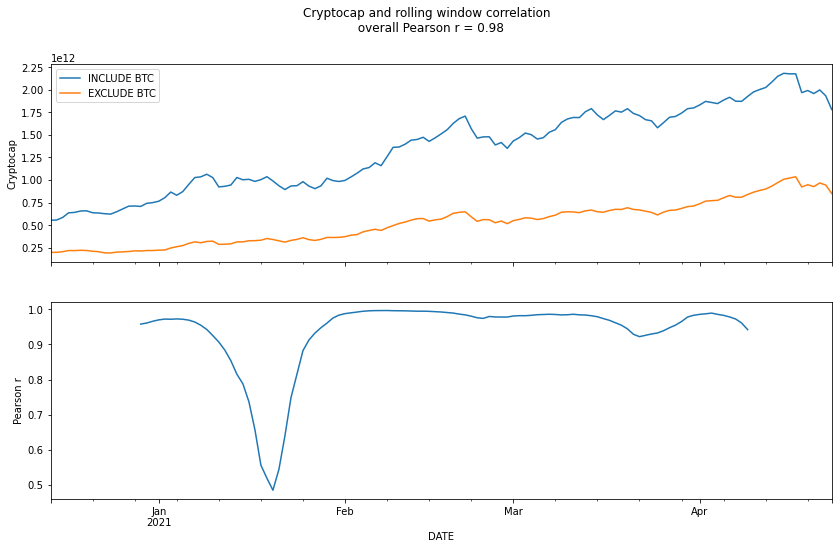

In [117]:
# 设置窗口宽度，以计算滑动窗口同步性
r_window_size = 30
# 插入缺失值
df_interpolated = df.interpolate()
# 计算滑动窗口同步性
rolling_r = df_interpolated['INCLUDE BTC'].rolling(window=r_window_size, center=True).corr(df_interpolated['EXCLUDE BTC'])
f,ax=plt.subplots(2,1,figsize=(14,8),sharex=True)
df.rolling(window=1,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='DATE',ylabel='Cryptocap')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='DATE',ylabel='Pearson r')
plt.suptitle("Cryptocap and rolling window correlation \n overall Pearson r = 0.98")

